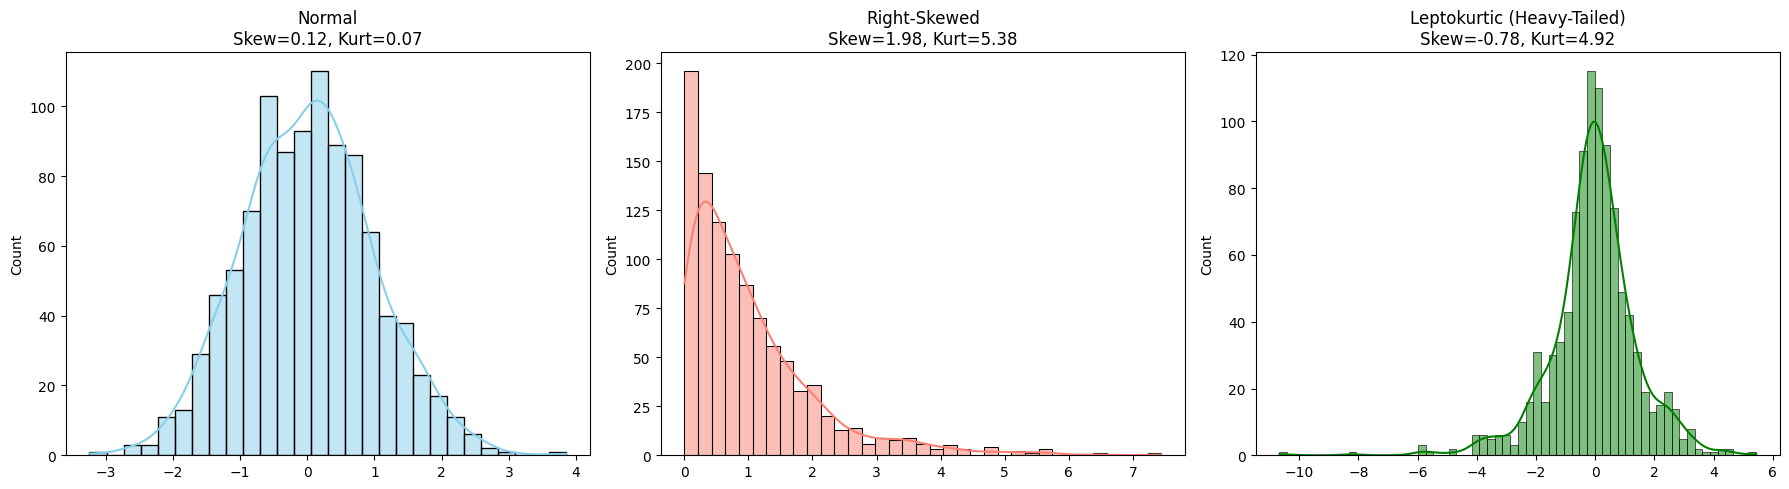

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Generate datasets
np.random.seed(42)

# Normal distribution (baseline)
normal_data = np.random.normal(loc=0, scale=1, size=1000)

# Right-skewed distribution
right_skewed = np.random.exponential(scale=1.0, size=1000)

# Leptokurtic distribution (heavy-tailed)
leptokurtic = np.random.laplace(loc=0, scale=1, size=1000)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Normal
sns.histplot(normal_data, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title(f"Normal\nSkew={skew(normal_data):.2f}, Kurt={kurtosis(normal_data):.2f}")

# Right-skewed
sns.histplot(right_skewed, kde=True, ax=axes[1], color="salmon")
axes[1].set_title(f"Right-Skewed\nSkew={skew(right_skewed):.2f}, Kurt={kurtosis(right_skewed):.2f}")

# Leptokurtic
sns.histplot(leptokurtic, kde=True, ax=axes[2], color="green")
axes[2].set_title(f"Leptokurtic (Heavy-Tailed)\nSkew={skew(leptokurtic):.2f}, Kurt={kurtosis(leptokurtic):.2f}")

plt.tight_layout()
plt.show()


In [1]:
import seaborn as sns, pandas as pd, numpy as np, matplotlib.pyplot as plt
titanic = sns.load_dataset("titanic").copy()
display(titanic.shape)          # (891, 15)
titanic.info(memory_usage='deep')

(891, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 313.7 KB


<Axes: >

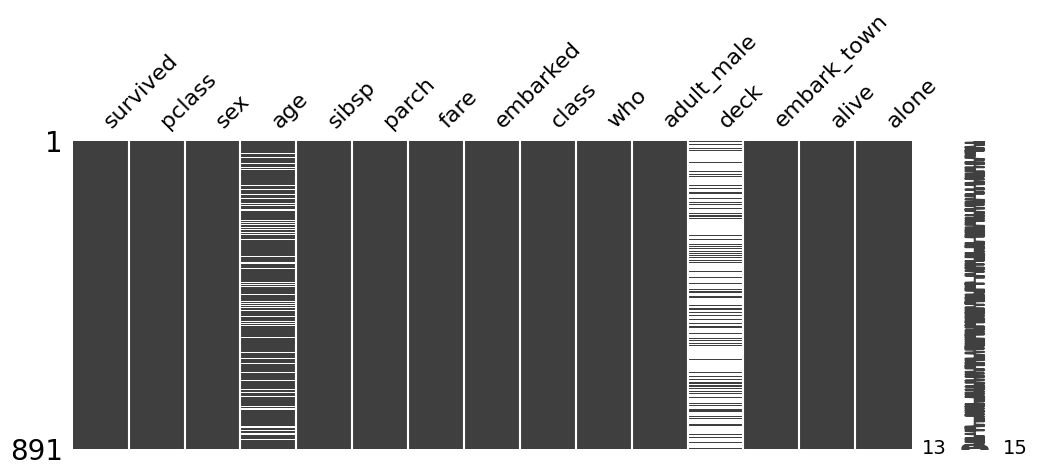

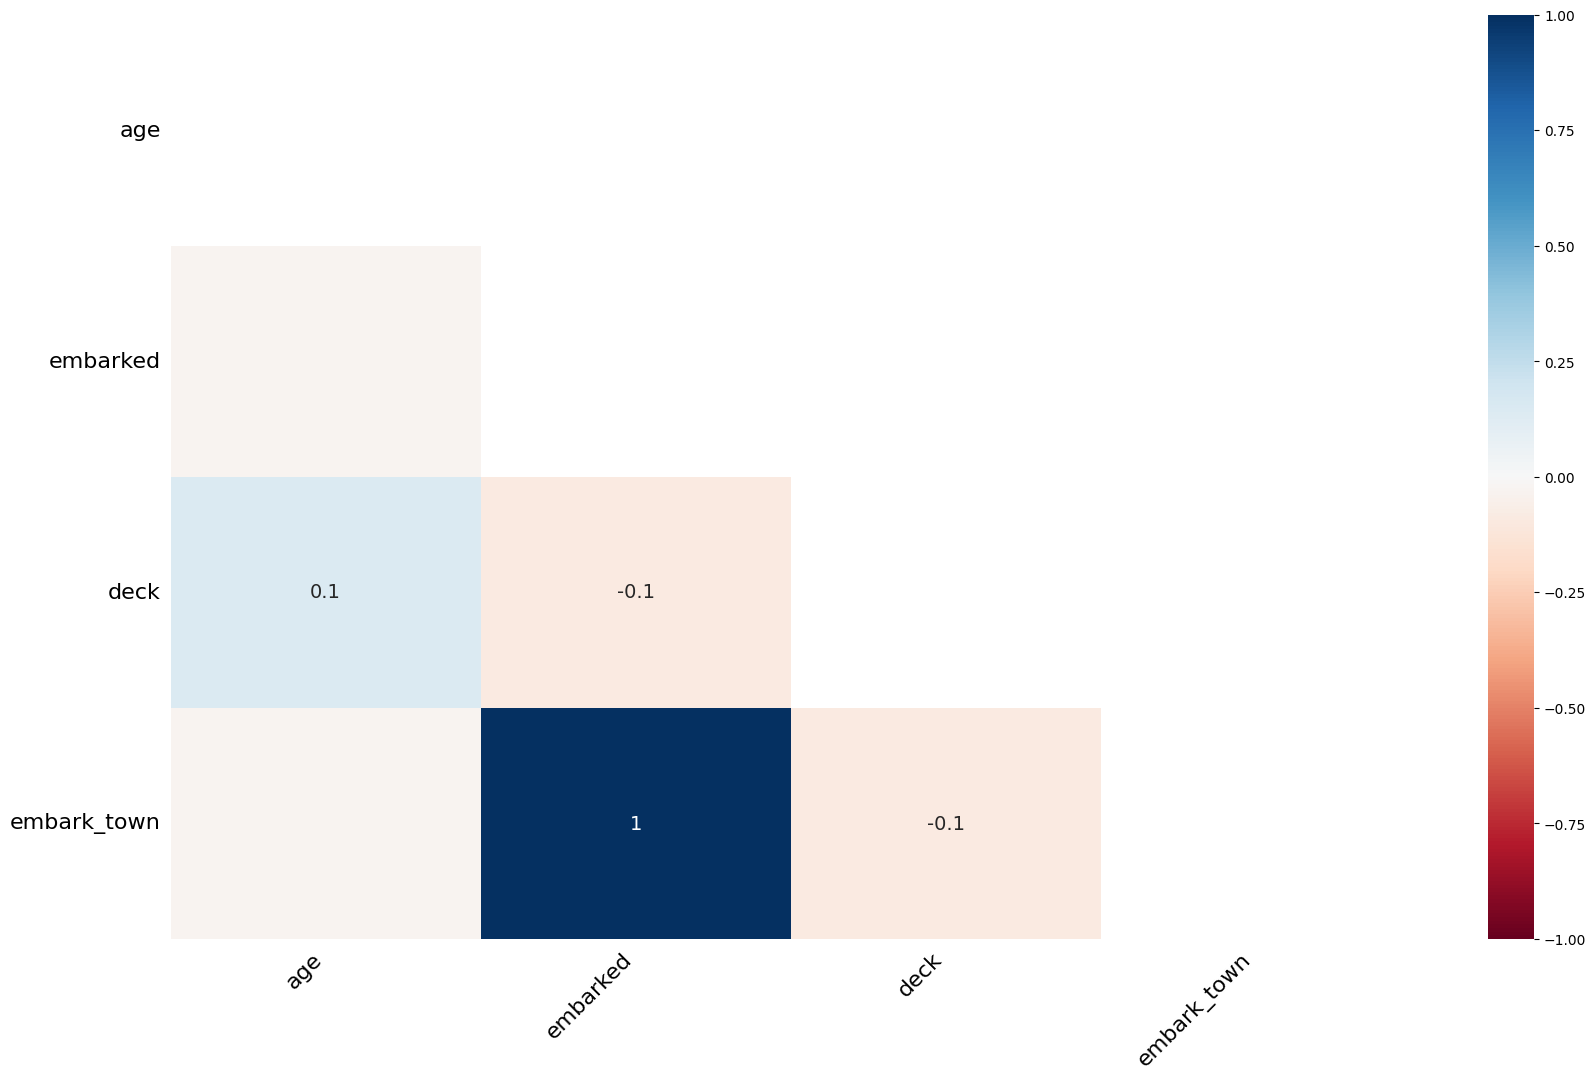

In [5]:
import missingno as msno
msno.matrix(titanic, figsize=(12,4))
msno.heatmap(titanic)

In [6]:
titanic.duplicated().sum()      # 0 → good
titanic.select_dtypes('object').applymap(type).nunique().max()  # 1 → no mixed types

/var/folders/4r/6fydpnls2mg8q1p98g9zqmy00000gn/T/ipykernel_50980/1970950594.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  titanic.select_dtypes('object').applymap(type).nunique().max()  # 1 → no mixed types


2

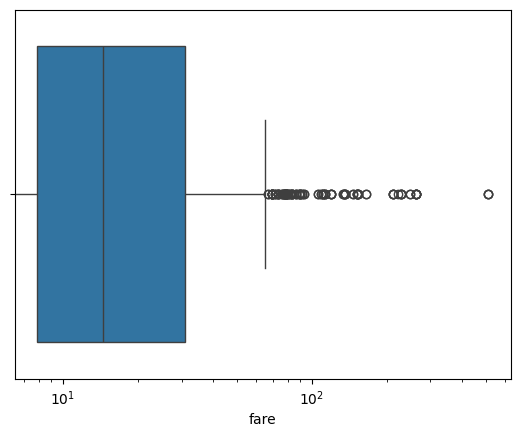

In [9]:
sns.boxplot(x=titanic['fare']); plt.xscale('log')

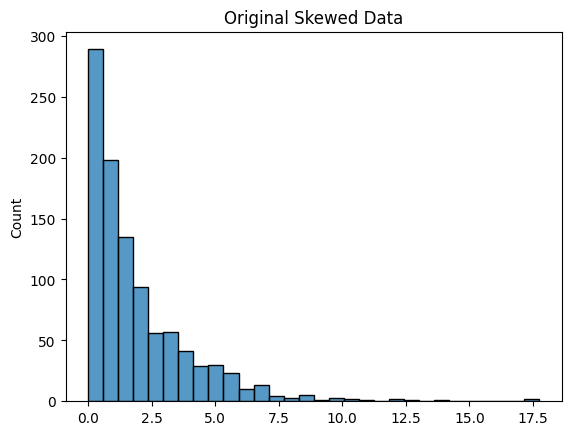

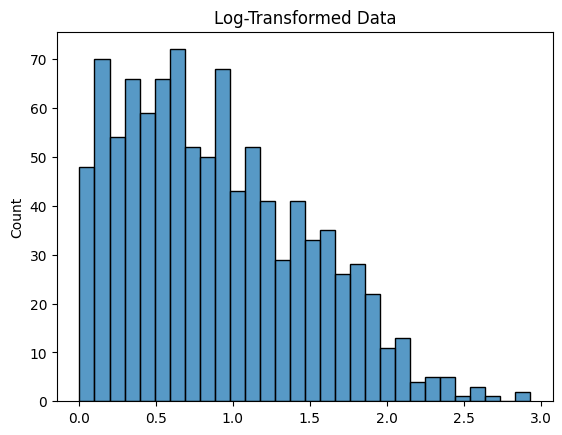

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Right-skewed distribution
data = np.random.exponential(scale=2, size=1000)

# Original
sns.histplot(data, bins=30)
plt.title("Original Skewed Data")
plt.show()

# Log-transformed
sns.histplot(np.log1p(data), bins=30)
plt.title("Log-Transformed Data")
plt.show()


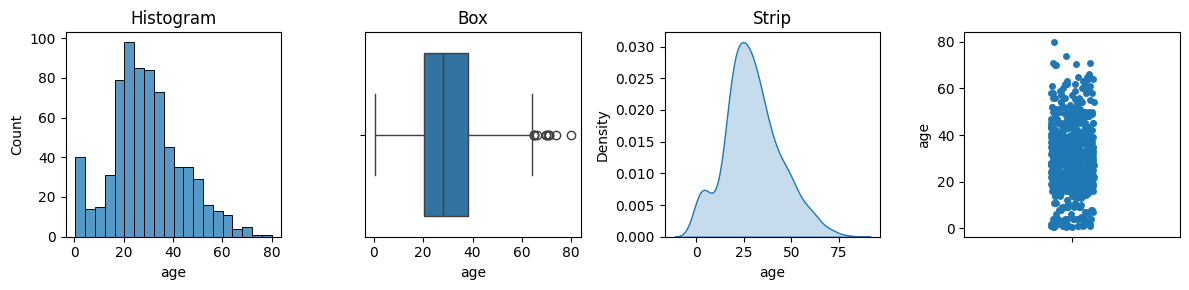

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
t = sns.load_dataset("titanic").dropna(subset=['age'])
age = t['age']

fig, ax = plt.subplots(1,4, figsize=(12,3))
sns.histplot(age, bins='fd', ax=ax[0]);      ax[0].set_title('Histogram')
sns.boxplot(  x=age, ax=ax[1]);              ax[1].set_title('Box')
sns.kdeplot(   age, fill=True, ax=ax[2]);    ax[2].set_title('KDE')
sns.stripplot(   age, ax=ax[3]);    ax[2].set_title('Strip')
plt.tight_layout()

Text(0.5, 1.0, 'Iris • Pearson Corrgram')

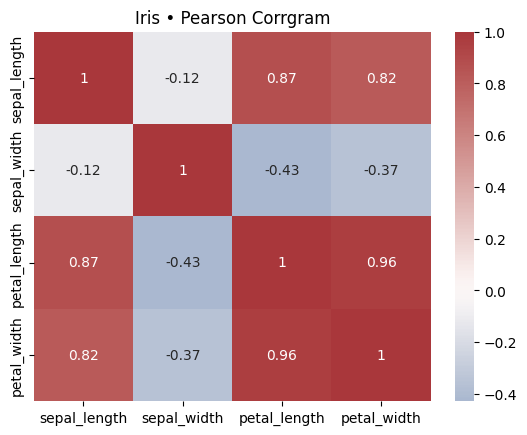

In [9]:
iris = sns.load_dataset("iris")
num_cols = iris.select_dtypes(float)
corr = num_cols.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='vlag', center=0)
plt.title("Iris • Pearson Corrgram")

(Text(0, 0.5, 'Proportion'), Text(0.5, 1.0, 'Survival Proportion by Sex'))

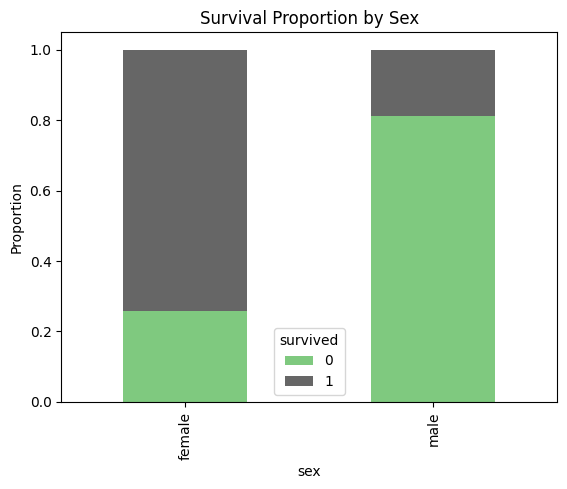

In [12]:
import pandas as pd

titanic = sns.load_dataset("titanic")
ct = pd.crosstab(titanic['sex'], titanic['survived'])
ct_norm = ct.div(ct.sum(axis=1), axis=0)

ct_norm.plot(kind='bar', stacked=True, colormap='Accent')
plt.ylabel("Proportion"), plt.title("Survival Proportion by Sex")

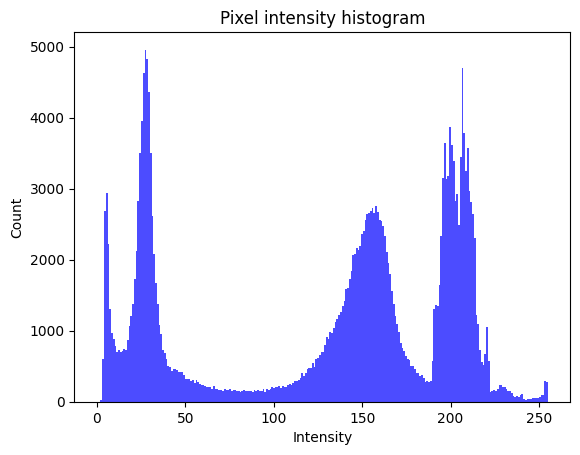

In [13]:
from skimage import data
image = data.camera()  # example grayscale image
plt.hist(image.ravel(), bins=256, color='blue', alpha=0.7)
plt.title("Pixel intensity histogram"); plt.xlabel("Intensity"); plt.ylabel("Count")
plt.show()

           ice    drown
ice    1.00000  0.56283
drown  0.56283  1.00000


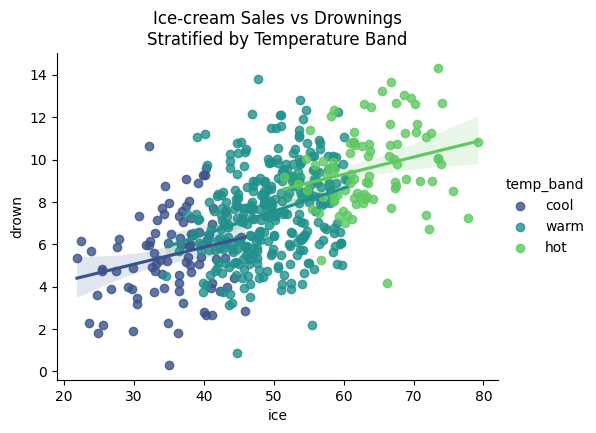

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reproducible sample
np.random.seed(0)
n = 500

temp   = np.random.normal(25, 5, n)          # confounder Z
ice    = 2 * temp + np.random.normal(0, 3, n)   # predictor X depends on Z
drown  = 0.3 * temp + np.random.normal(0, 2, n) # outcome Y depends on Z

df = pd.DataFrame({'ice': ice, 'drown': drown, 'temp': temp})

# Overall correlation (inflated by the confounder)
print(df[['ice', 'drown']].corr())

# Create a categorical temperature band for stratified plotting
df['temp_band'] = pd.cut(df['temp'],
                         bins=3,
                         labels=['cool', 'warm', 'hot'])

# Stratified regression plot
sns.lmplot(data=df,
           x='ice',
           y='drown',
           hue='temp_band',
           palette='viridis',
           height=4,
           aspect=1.3)

plt.title('Ice-cream Sales vs Drownings\nStratified by Temperature Band')
plt.show()
